# Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preparation (Brazilian IBOV index)

## Downloading data

In [2]:
df = yf.download("^BVSP", interval="1mo", start="2007-01-01")

[*********************100%***********************]  1 of 1 completed


## Drop unnecessary data

In [3]:
df.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)

## Defining trailling month positive return criteria

In [4]:
df["ttm"] = df.pct_change(periods=12)

## Creating return column

In [5]:
df["monthly_pct"] = df["Adj Close"].pct_change()

In [6]:
df

,Adj Close,ttm,monthly_pct
Date,,,
2007-01-01,44642.000000,NaN,NaN
2007-02-01,43892.000000,NaN,-0.016800
2007-03-01,45805.000000,NaN,0.043584
2007-04-01,48956.000000,NaN,0.068792
2007-05-01,52268.000000,NaN,0.067653
...,...,...,...
2022-04-01,107876.000000,-0.092671,-0.101026
2022-05-01,111351.000000,-0.117774,0.032213
2022-06-01,98542.000000,-0.222867,-0.115033


In [7]:
df["ttm_positive"] = df.apply(lambda x: 1 if x["ttm"] > 0 else 0, axis=1)

In [8]:
df.dropna(inplace=True)

In [9]:
df

,Adj Close,ttm,monthly_pct,ttm_positive
Date,,,,
2008-01-01,59490.000000,0.332602,-0.068810,1
2008-02-01,63489.000000,0.446482,0.067221,1
2008-03-01,60968.000000,0.331034,-0.039708,1
2008-04-01,67868.000000,0.386306,0.113174,1
2008-05-01,72593.000000,0.388861,0.069620,1
...,...,...,...,...
2022-04-01,107876.000000,-0.092671,-0.101026,0
2022-05-01,111351.000000,-0.117774,0.032213,0
2022-06-01,98542.000000,-0.222867,-0.115033,0


## Plotting monthly return histogram

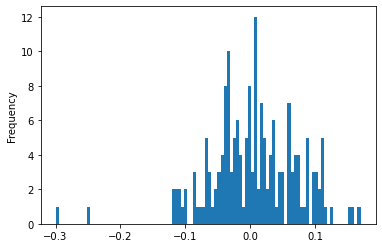

In [13]:
df["monthly_pct"].plot(kind="hist", bins=100);

## Creating auxiliary boolean column

In [11]:
df["momentum_ret"] = df.apply(lambda x: x["monthly_pct"] if x["ttm_positive"] > 0 else 0, axis=1)

# Plotting the result of the momentum strategy vs. the index itself

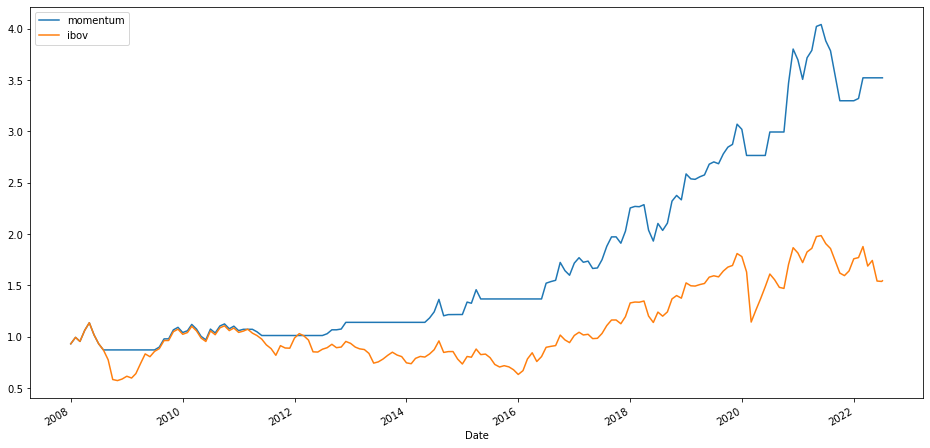

In [12]:
plt.figure(figsize=(16,8))
np.cumprod(1 + df["momentum_ret"]).plot(label="momentum")
np.cumprod(1 + df["monthly_pct"]).plot(label="ibov")
plt.legend();